<a href="https://colab.research.google.com/github/ismailsangu/IE423-TASK/blob/main/Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Online Shoppers Purchasing Intention

#Initialize

In [751]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [752]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Data

In [753]:
dfOSPIR = pd.read_csv('/content/drive/MyDrive/Data_Sets/online_shoppers_intention.csv')

In [754]:
dfOSPIR.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#1.Exploratory Data Analysis(EDA)

In [755]:
dfOSPIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [756]:
dfOSPIR.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


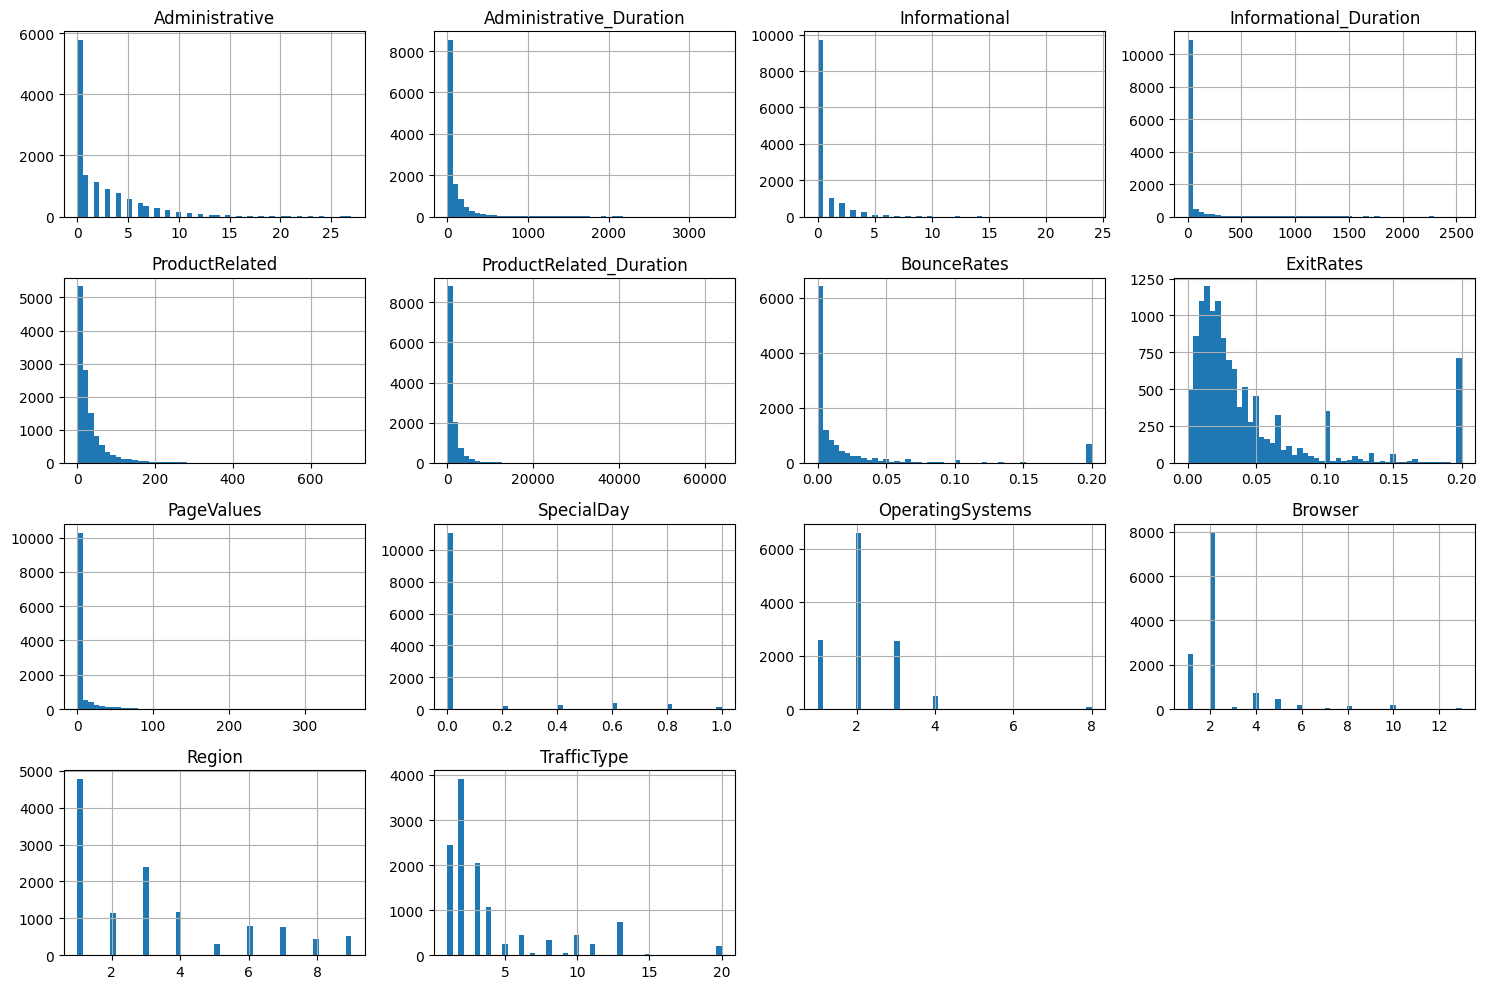

In [757]:
dfOSPIR.hist(figsize=(15,10),bins=50)
plt.tight_layout()
plt.show()

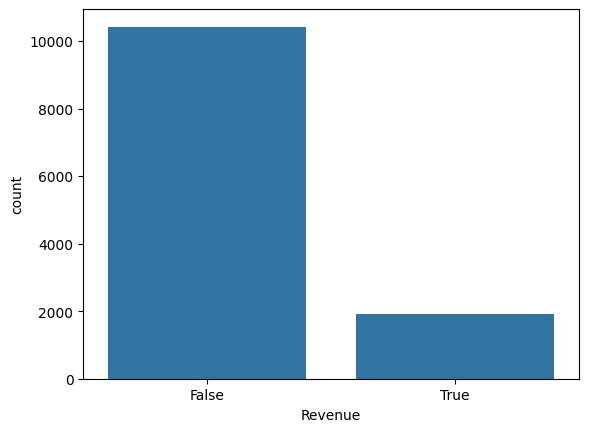

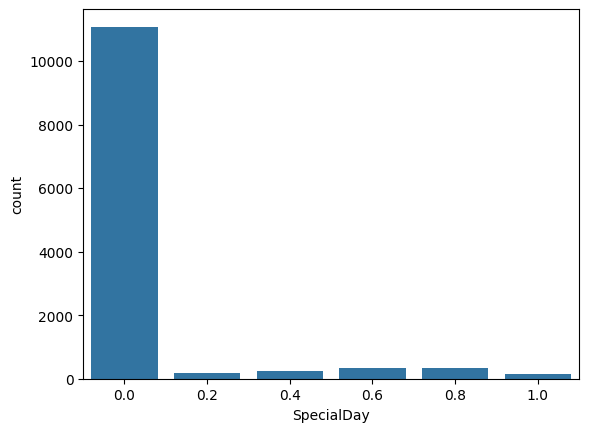

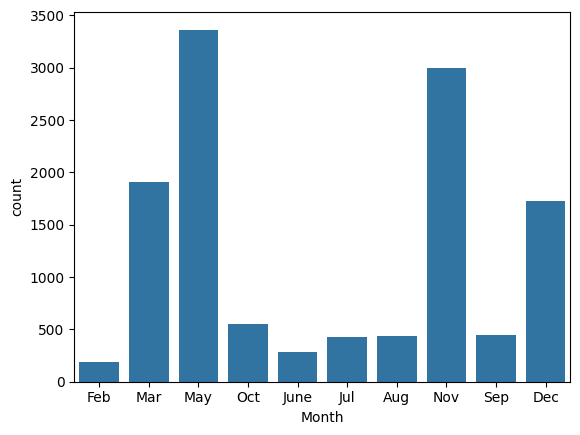

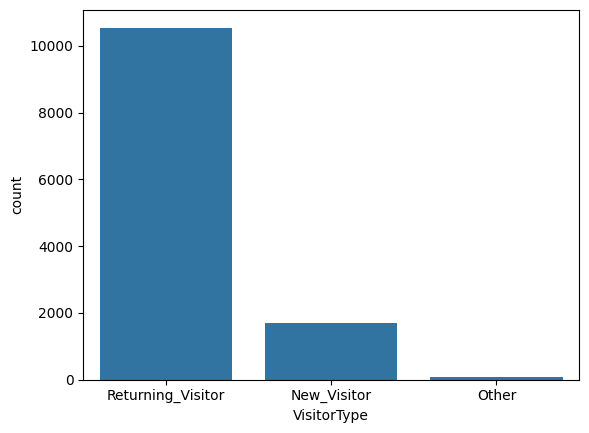

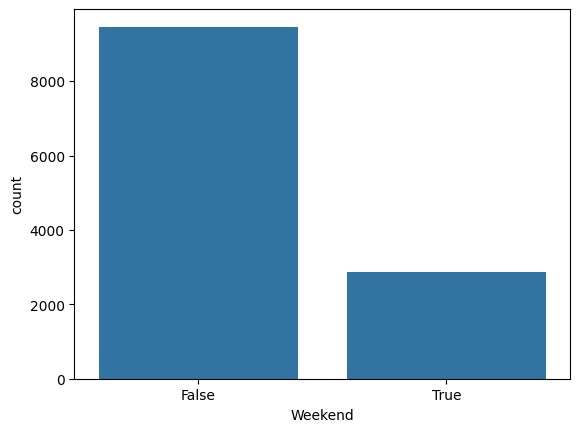

In [807]:
import seaborn as sns
sns.countplot(x='Revenue', data=dfOSPIR)
plt.show()
sns.countplot(x='SpecialDay', data=dfOSPIR)
plt.show()
sns.countplot(x='Month', data=dfOSPIR)
plt.show()
sns.countplot(x='VisitorType', data=dfOSPIR)
plt.show()
sns.countplot(x='Weekend', data=dfOSPIR)
plt.show()

There is no special distribution.

In [759]:
dfOSPIR.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [760]:
dfOSPIR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [808]:
# Select non-numeric features
cols_obj = [col for col in dfOSPI.columns if dfOSPI[col].dtype == 'object']
cols_obj


[]

In [762]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoder to each column with non-numeric data
label_encoder = LabelEncoder()
for col in cols_obj:
    dfOSPI[col] = label_encoder.fit_transform(dfOSPIR[col])





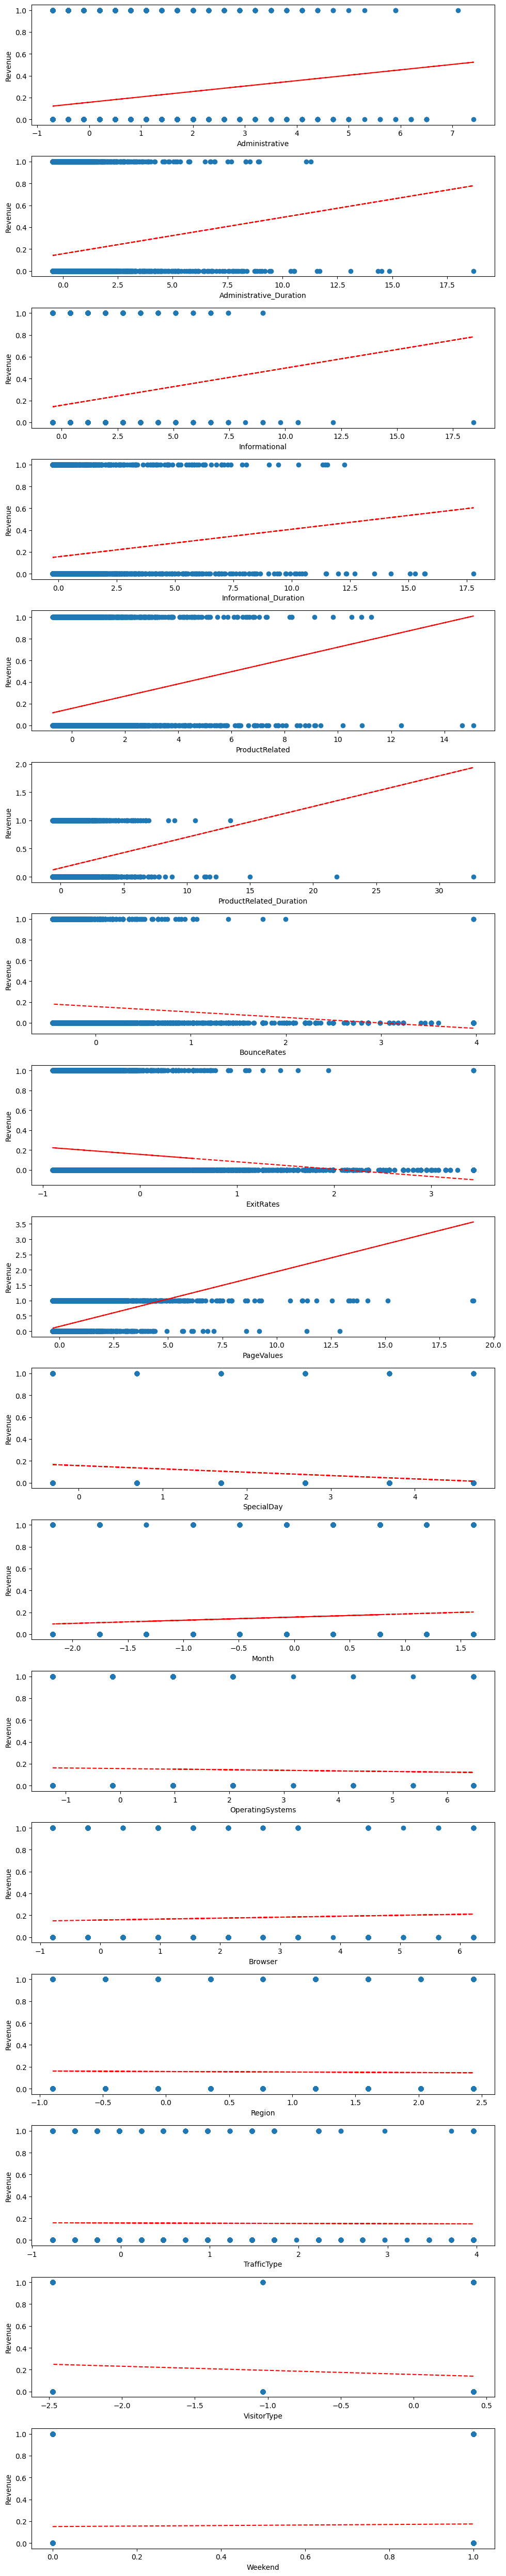

In [764]:

features = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend',]
current_value = dfOSPI['Revenue']

fig, axes = plt.subplots(len(features), 1, figsize=(10, 50))

for i, feature in enumerate(features):
    axes[i].scatter(dfOSPI[feature], current_value)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Revenue')
    z = np.polyfit(dfOSPI[feature], current_value, 1)
    p = np.poly1d(z)
    axes[i].plot(dfOSPI[feature], p(dfOSPI[feature]), "r--")

plt.tight_layout()
plt.show()

According to scatter plots and regression lines, the correlation between target variable Revenue and other fetures:
* Strong Positive Correlation: PageValues
* Moderate Negative Correlations: BounceRates, ExitRates
* Weak Positive Correlations: Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, Month
* Weak Negative Correlations: SpecialDay, OperatingSystems, Browser, VisitorType
* No Significant Correlations: Region, TrafficType, Weekend


#2. Data Preprocessing:

In [765]:
dfOSPI['VisitorType'].value_counts()

,count
VisitorType,
0.409670,10431
-2.474682,1693
-1.032506,81


In [766]:
dfOSPI.isnull().sum()

,0
ProductRelated_DurationRate,0
VisitorID,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0


There is no missed value as Dataset Information point out.

In [767]:
dfOSPI.duplicated().sum()

0

There are 125 duplicated values.

In [768]:
dfOSPI.drop_duplicates(inplace=True)

Duplicated values are removed to prevent misleading or inaccurate results.

In [769]:
dfOSPI.duplicated().sum()

0

In [770]:
dfOSPI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12329
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ProductRelated_DurationRate  12205 non-null  float64
 1   VisitorID                    12205 non-null  int64  
 2   Administrative               12205 non-null  float64
 3   Administrative_Duration      12205 non-null  float64
 4   Informational                12205 non-null  float64
 5   Informational_Duration       12205 non-null  float64
 6   ProductRelated               12205 non-null  float64
 7   ProductRelated_Duration      12205 non-null  float64
 8   BounceRates                  12205 non-null  float64
 9   ExitRates                    12205 non-null  float64
 10  PageValues                   12205 non-null  float64
 11  SpecialDay                   12205 non-null  float64
 12  Month                        12205 non-null  float64
 13  OperatingSystems     

In [771]:
numerical_cols = dfOSPI.select_dtypes(include='number').columns.tolist()
print(numerical_cols)

['ProductRelated_DurationRate', 'VisitorID', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'TotalTimeSpend', 'TotalPageVisited']


In [772]:
from sklearn.preprocessing import scale
dfOSPI[numerical_cols] = scale(dfOSPI[numerical_cols])

Numeric features are scaled to improve model performance

#3. Feature Engineering:

In [773]:
#Total time spend in page
dfOSPI['TotalTimeSpend'] = dfOSPI['Administrative_Duration'] + dfOSPI['Informational_Duration'] + dfOSPI['ProductRelated_Duration']
#Total number of page visited
dfOSPI['TotalPageVisited'] = dfOSPI['Administrative'] + dfOSPI['Informational'] + dfOSPI['ProductRelated']

dfOSPI['ProductRelated_DurationRate'] = (dfOSPI['ProductRelated_Duration'] ) /(dfOSPI['Administrative_Duration'] + dfOSPI['Informational_Duration'] + 1)


To analyse cumulative affect of time spend in page and number of visited page, features of TotalTimeSpend and TotalPageVisited are created.

Additionally, to see effect of time spend ratio in product related pages, feature of ProductRelated_DurationRate is created.


In [774]:
dfOSPI.head()

,ProductRelated_DurationRate,VisitorID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,...,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TotalTimeSpend,TotalPageVisited
0,-2.140765,-1.738791,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,...,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,False,False,-1.335070,-1.797345
1,-2.027252,-1.738510,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,1.268054,...,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,False,False,-1.301728,-1.774919
2,-2.140765,-1.738228,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,3.434394,...,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,False,False,-1.335070,-1.797345
3,-2.136036,-1.737946,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,2.134590,...,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,False,False,-1.333680,-1.774919
4,-1.027799,-1.737665,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,0.184884,...,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,True,False,-1.008165,-1.595514


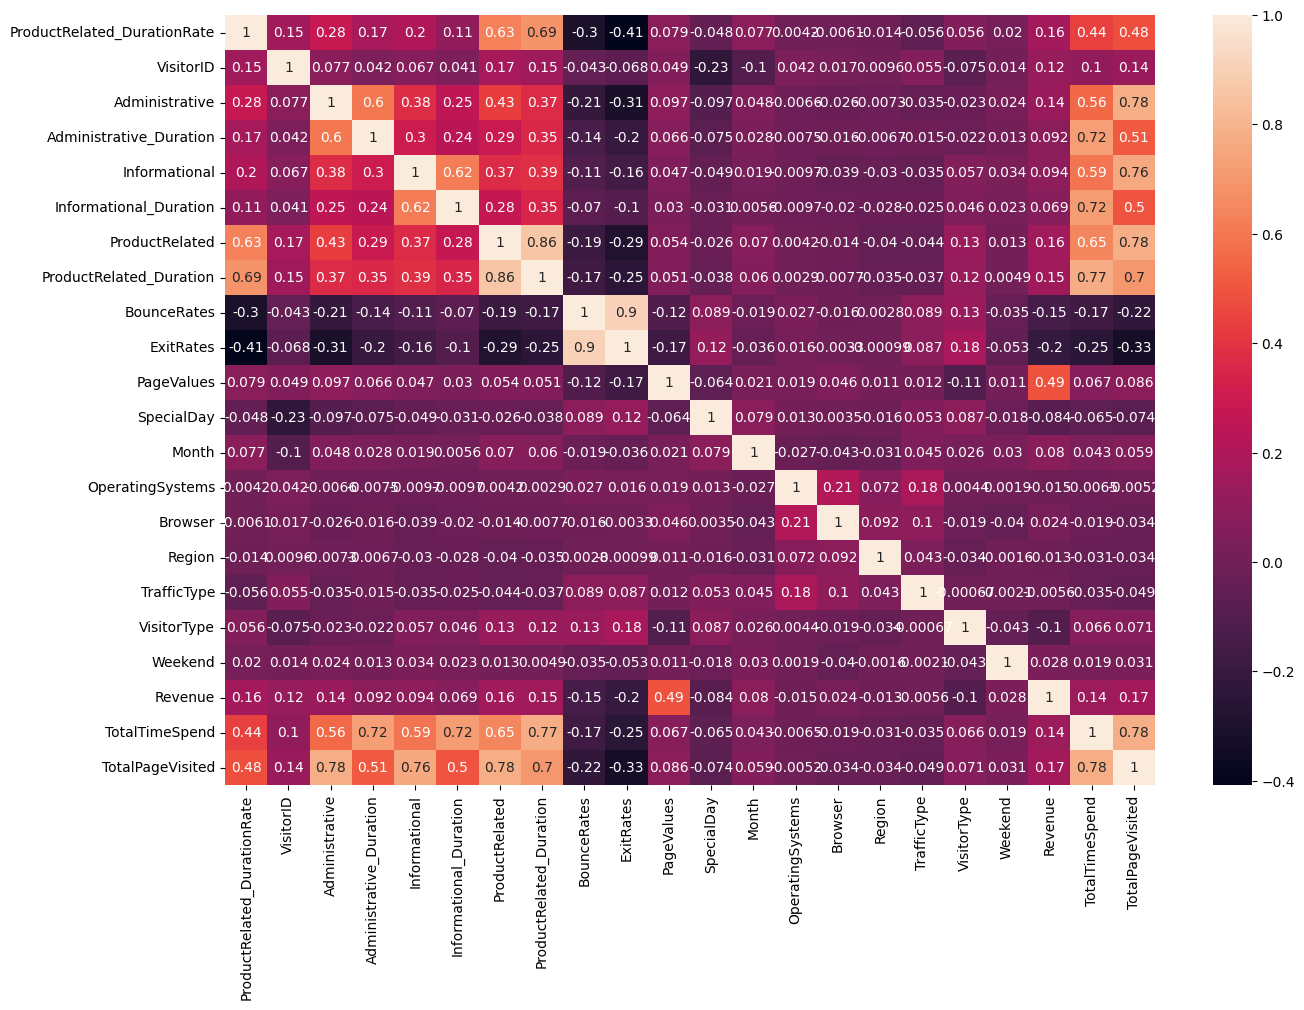

In [775]:

# Calculate correlation matrix
correlation_matrix = dfOSPI.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(15, 10))  # Adjust the figure size (width, height) as needed
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 10})  # Increase annotation font size
plt.show()

The most important features affecting target value, Revenue, based on their correlation values are:

1. PageValues
2. ExitRates
3. TotalPageVisited
4. ProductRelated_DurationRate
5. ProductRelated
6. ProductRelated_Duration
7. BounceRates
8. Administrative
9. TotalTimeSpend

In [776]:
y = dfOSPI.loc[:,['Revenue']]

In [777]:
X = dfOSPI.loc[:,['PageValues', 'ExitRates', 'TotalPageVisited', 'ProductRelated_DurationRate',
                   'ProductRelated','ProductRelated_Duration','BounceRates', 'Administrative'
                   ,'TotalTimeSpend']]

In [779]:
X.head()

,PageValues,ExitRates,TotalPageVisited,ProductRelated_DurationRate,ProductRelated,ProductRelated_Duration,BounceRates,Administrative,TotalTimeSpend
0,-0.318962,3.434394,-1.797345,-2.140765,-0.696218,-0.628793,3.969402,-0.702302,-1.335070
1,-0.318962,1.268054,-1.774919,-2.027252,-0.673793,-0.595451,-0.450137,-0.702302,-1.301728
2,-0.318962,3.434394,-1.797345,-2.140765,-0.696218,-0.628793,3.969402,-0.702302,-1.335070
3,-0.318962,2.134590,-1.774919,-2.136036,-0.673793,-0.627404,0.654748,-0.702302,-1.333680
4,-0.318962,0.184884,-1.595514,-1.027799,-0.494387,-0.301889,-0.008183,-0.702302,-1.008165


#4. Model Building:

#A.Linear Regression Model

In [780]:
# Fit linear regression model - aka train model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, y)
# Display regression model
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 [0.15974096]
Coefficients: 
 [[ 0.16926103 -0.05143498  0.00494391  0.00813719  0.010497    0.01028234
   0.02378223  0.00029878  0.00096683]]


In [781]:
# Generate new prediction - aka run scoring model
New_PageValues= 1
New_ExitRates= 2
New_TotalPageVisited= -1.79
New_ProductRelated_DurationRate= -1.5
New_ProductRelated= -0.6
New_ProductRelated_Duration= -0.55
New_BounceRates= 1.5
New_Administrative=-0.7
New_TotalTimeSpend= -1.7
print ('Predicted Revenue: \n', regr.predict([[New_PageValues,
New_ExitRates,
New_TotalPageVisited,
New_ProductRelated_DurationRate,
New_ProductRelated,
New_ProductRelated_Duration,
New_BounceRates,
New_Administrative,
New_TotalTimeSpend]]))

Predicted Revenue: 
 [[0.22694373]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Logistic Regression, Decision Trees, Random Forest, SVM

In [782]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

#B.Decision Tree Model

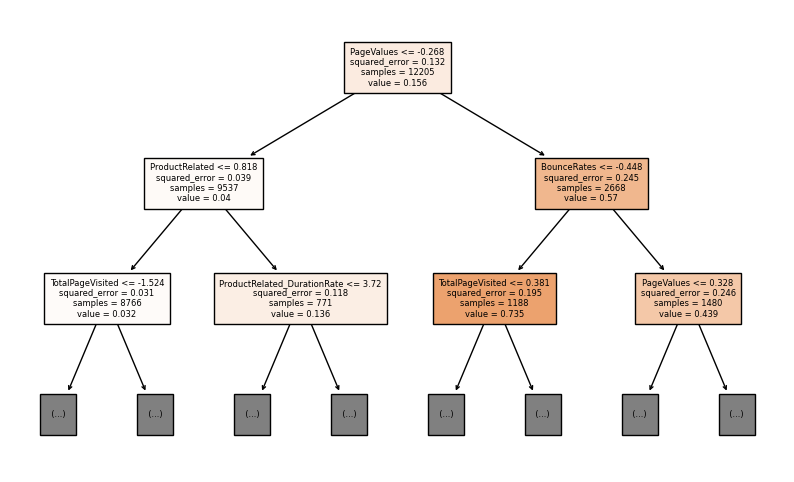

In [783]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrOSPI  = DecisionTreeRegressor(random_state=1)
mdlDtrOSPI.fit(X,y)
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=100)
plot_tree(mdlDtrOSPI, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [784]:
# Rebuild model
mdlDtrOSPISpl = DecisionTreeRegressor(random_state=1)
mdlDtrOSPISpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrOSPISpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
0.14235439658618163


In [785]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrOSPIDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrOSPIDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrOSPIDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  0.15509720207782507
Max leaf nodes:  50 	 Mean Absolute Error:  0.14617515563379838
Max leaf nodes:  500 	 Mean Absolute Error:  0.1422796565654161
Max leaf nodes:  50000 	 Mean Absolute Error:  0.1484994191179309


#C.Random Forest Model

In [786]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsOSPI = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsOSPI.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsOSPI.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE (Random Forest):
0.15139868055304959


#D.Gradient Boost Tree Model

In [787]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbOSPI = XGBRegressor()
mdlXgbOSPI.fit(X_train, y_train)
y_test_pred = mdlXgbOSPI.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
0.1545108


In [788]:
#Build and score a tuned Gradient Boosting Model
mdlXgbOSPI = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbOSPI.fit(X_train, y_train)
y_test_pred = mdlXgbOSPI.predict(X_test)
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
0.15426227


#Model Comparision According to MAE

In [789]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1),
    'Gradient Boosting': XGBRegressor()
}
maes=[]
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    maes.append(mae)
print("Max lead nodes min MAE:", min(maes))


# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MAE: {mae}')

Max lead nodes min MAE: 0.1422796565654161
Linear Regression MAE: 0.20465630021710082
Decision Tree MAE: 0.14235439658618163
Random Forest MAE: 0.15139868055304959
Gradient Boosting MAE: 0.15451079607009888


According to MAE, best performing model is decision tree model tuned with Max lead nodes min with MAE:0.142 and Linear Regression model is worst one with MAE 0.204.

Even if Random Forest and Gradient Boosting are typically more powerful due to their ensemble nature, they don't outperform the optimized single tree. This might indicate that the additional complexity isn't providing significant benefits for this dataset.

Interestingly, MAEs are significantly small. Small MAE may mean more accurate prediciton but that small is extraordinary.

#Logistic Regression

In [790]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

mdlLgrOSPI = LogisticRegression(random_state=1)
mdlLgrOSPI.fit(X_train, y_train)
y_test_pred = mdlLgrOSPI.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Our target value, Revenue, is binary so we need confusion metrix for accurate prediction.

In [791]:
# Display model results using
from sklearn.metrics import confusion_matrix

print ('Confusion Matrix:')
cm=confusion_matrix(y_test, y_test_pred)
print(cm)
#Extract values from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate metrics
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
cmf1_score = 2 * (precision * recall) / (precision + recall)
specificity = TN / (TN + FP)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {cmf1_score:.4f}")
print(f"Specificity: {specificity:.4f}")

Confusion Matrix:
[[1990   42]
 [ 261  148]]
Accuracy: 0.8759
Precision: 0.7789
Recall: 0.3619
F1 Score: 0.4942
Specificity: 0.9793


#Metric 1: F1-score

In [792]:
# Display performance results
from sklearn.metrics import classification_report

print ('Classification Report (Logistic Regression):')
print (classification_report(y_test, y_test_pred))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

       False       0.88      0.98      0.93      2032
        True       0.78      0.36      0.49       409

    accuracy                           0.88      2441
   macro avg       0.83      0.67      0.71      2441
weighted avg       0.87      0.88      0.86      2441



#Metric 2: ROC AUC Score

In [793]:
# Display summary results
from sklearn.metrics import roc_auc_score

print ('AUC Score (Logistic Regression):')
print (roc_auc_score(y_test, y_test_pred))

AUC Score (Logistic Regression):
0.6705944496852321


#Naive Bayes - Gaussian Model

In [794]:
# Build Naive Bayes - Gaussian model
from sklearn.naive_bayes import GaussianNB

mdlNbgBANK = GaussianNB()
mdlNbgBANK.fit(X_train,y_train)
y_test_pred = mdlNbgBANK.predict(X_test)

print ('Results (Naive Bayes - Gaussian):\n')

print ('Classification Report:')
print (classification_report(y_test, y_test_pred))

print ('AUC Score:')
print (roc_auc_score(y_test, y_test_pred))

Results (Naive Bayes - Gaussian):

Classification Report:


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

       False       0.92      0.85      0.89      2032
        True       0.46      0.63      0.54       409

    accuracy                           0.82      2441
   macro avg       0.69      0.74      0.71      2441
weighted avg       0.84      0.82      0.83      2441

AUC Score:
0.7432991452168723


# K-Nearest Neighbor (KNN) Model

In [795]:
# Build KNN model with 5 nearest neighbors
from sklearn.neighbors import KNeighborsClassifier

mdlKnnBANK = KNeighborsClassifier(n_neighbors=10)
mdlKnnBANK.fit(X_train, y_train)
y_test_pred = mdlKnnBANK.predict(X_test)

print ('AUC Score (K-Nearest Neighbor):')
print (roc_auc_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


AUC Score (K-Nearest Neighbor):
0.696743305161427


# Support Vector Machines

In [796]:
# Build Support Vector Machines - Classifier model

from sklearn.svm import SVC
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


mdlSvmBANK = SVC()
mdlSvmBANK.fit(X_train, y_train)
y_test_pred = mdlSvmBANK.predict(X_test)

print("F1 Score: ", f1_score(y_test, y_test_pred))
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Recall: ", recall_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred))
print("AUC Score (SVM):'", roc_auc_score(y_test, y_test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score:  0.5959438377535102
Accuracy:  0.8938959442851291
Recall:  0.4669926650366748
Precision:  0.8232758620689655
AUC Score (SVM):' 0.7234077498411721


* Naive Bayes - Gaussian Model giving highest AUC Score:0.743 means good overall ability to distinguish between the classes
* SVM giving highest F1 Score: 0.595 means moderate balance between precision and recall.

# 5. Model Optimization:

#Collaborative Filtering

In [797]:
# Create the VisitorID column based on the index
dfOSPI['VisitorID'] = dfOSPI.index

# Reorder the columns to make VisitorID the first column
cols = dfOSPI.columns.tolist()
cols = cols[-1:] + cols[:-1]
dfOSPI = dfOSPI[cols]

# Display the DataFrame to verify
dfOSPI.head()


,TotalPageVisited,ProductRelated_DurationRate,VisitorID,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,...,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,TotalTimeSpend
0,-1.797345,-2.140765,0,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,...,-0.31024,-1.334491,-1.239776,-0.794017,-0.896370,-0.765321,0.40967,False,False,-1.335070
1,-1.774919,-2.027252,1,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.595451,-0.450137,...,-0.31024,-1.334491,-0.136980,-0.209237,-0.896370,-0.516347,0.40967,False,False,-1.301728
2,-1.797345,-2.140765,2,-0.702302,-0.460019,-0.398824,-0.246257,-0.696218,-0.628793,3.969402,...,-0.31024,-1.334491,2.068612,-0.794017,2.433853,-0.267374,0.40967,False,False,-1.335070
3,-1.774919,-2.136036,3,-0.702302,-0.460019,-0.398824,-0.246257,-0.673793,-0.627404,0.654748,...,-0.31024,-1.334491,0.965816,-0.209237,-0.480092,-0.018400,0.40967,False,False,-1.333680
4,-1.595514,-1.027799,4,-0.702302,-0.460019,-0.398824,-0.246257,-0.494387,-0.301889,-0.008183,...,-0.31024,-1.334491,0.965816,0.375543,-0.896370,-0.018400,0.40967,True,False,-1.008165


In [798]:
dfOSPI.columns

Index(['TotalPageVisited', 'ProductRelated_DurationRate', 'VisitorID',
       'Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'TotalTimeSpend'],
      dtype='object')

In [799]:
# Prepare data into Surprise library format

!pip3 install scikit-surprise #or !conda install -c conda-forge scikit-surprise
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(0,5))

# Load the data into Surprise format
X = Dataset.load_from_df(dfOSPIR[['Region', 'OperatingSystems', 'Revenue']], reader)
X_train, X_test = train_test_split(X, test_size=.25)

In [800]:
# Define SVD model

from surprise import SVD

mdlSvdOSPI = SVD()

In [801]:

# Fit SVD model

mdlSvdOSPI.fit(X_train)
test_pred = mdlSvdOSPI.test(X_test)

In [802]:

# Evalute SVD accuracy

from surprise import accuracy

accuracy.rmse(test_pred)

RMSE: 0.3502


0.35021856895779563

In [803]:
# Tune hyperparameters

from surprise.model_selection import GridSearchCV

param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(X)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


0.3609928623980159
{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}


In [804]:

# Cross-validate

from surprise.model_selection import cross_validate

cross_validate(mdlSvdOSPI, X, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3494  0.3659  0.3713  0.3674  0.3558  0.3620  0.0081  
MAE (testset)     0.2435  0.2550  0.2591  0.2586  0.2566  0.2546  0.0057  
Fit time          0.32    0.31    0.27    0.13    0.13    0.23    0.08    
Test time         0.02    0.05    0.01    0.03    0.01    0.02    0.01    


{'test_rmse': array([0.34935763, 0.36592107, 0.37132049, 0.36737398, 0.3557866 ]),
 'test_mae': array([0.24352721, 0.25503837, 0.25911833, 0.2585716 , 0.25656066]),
 'fit_time': (0.31549978256225586,
  0.30829668045043945,
  0.26737046241760254,
  0.1307682991027832,
  0.13385868072509766),
 'test_time': (0.021224498748779297,
  0.04830479621887207,
  0.011640071868896484,
  0.025644779205322266,
  0.011913776397705078)}

#Predict

In [805]:
dfOSPIR[dfOSPIR['Region']==1]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12324,0,0.0,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False


In [806]:
prediction = mdlSvdOSPI.predict(1, 4)
print(prediction.est)  # Print the estimated rating

0.18405828955242237


By the collaborative filtering, trained model predict purchasing behavior of user based on their region and operating systems according to other users purchasing behavior ,having same region and operating systems.

# 6.Insights and Conclusion:

* Interpret the results of the analysis and model.
* Provide actionable insights based on the findings.
* Discuss limitations and potential improvements.

At the first insight the variety in value type harden analysing correlation between them. There is no any special distribution examined from distribution of variables. According to scatter plots and regression lines, the correlation between target variable Revenue and other fetures are similar to correlation heat map after clean and add new features into data. The Revenue correlation importance list based on heat map:
1. PageValues
2. ExitRates
3. TotalPageVisited(New Feature)
4. ProductRelated_DurationRate(New Feature)
5. ProductRelated
6. ProductRelated_Duration
7. BounceRates
8. Administrative
9. TotalTimeSpend(New Feature)

* PageValues has no comparable thing like count, time, or money so it does not become useful even if it has the most effect on Revenue.
* The data of traffic in the page may have more effect on Revenue instead of traffic type.
* The data set X, used for model training is created by above features.



For the prediction of target variable,Revenue, Linear Regression Model, Decision Tree Model, Random Forest Model and Gradient Boost model are trained and compared in turn of MAE:

* According to MAE, best performing model is decision tree model tuned with Max lead nodes min with MAE:0.142 and Linear Regression model is worst one with MAE 0.204.

* Even if Random Forest and Gradient Boosting are typically more powerful due to their ensemble nature, they don't outperform the optimized single tree. This might indicate that the additional complexity isn't providing significant benefits for this dataset.

* Interestingly, MAEs are significantly small. Small MAE may mean more accurate prediciton but that small is extraordinary. May scaling the numerical variables decreases MAE artifically.

To evaluate model performance, accuracy, precision, recall,
F1-score, ROC-AUC metrics anazlyzed by confusion matrix, Naive Bayes - Gaussian Model, KNN Model, SVM.
* Naive Bayes - Gaussian Model giving highest AUC Score:0.743 means good overall ability to distinguish between the classes
* SVM giving highest F1 Score: 0.595 means moderate balance between precision and recall.

Collaborative Filtering is used in model optimization to predict purchasing behavior of user based on their region and operating systems according to other users purchasing behavior ,having same region and operating systems:
* Region and Operation System features were chosen because visitors can be distinguished in a few group which makes prediction precise.
* It works well but gives low rates for revenue because of their slight  correlation with Revenue.
